In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
result = response.json()

In [6]:
search_dict = {}
for line in result:
    count = int(line.get('query_count'))
    text = line.get('query_text')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [7]:
search_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
search_df = search_df.reset_index()
search_df.columns = ['term', 'text']
search_df.head()

,term,text
0,ebid,521
1,property maps,252
2,maps,237
3,property tax,214
4,jobs,210


In [8]:
search_df = search_df.sort_values('text', ascending=False)
search_df.head(10)

,term,text
0,ebid,521
1,property maps,252
2,maps,237
10,property taxes,235
3,property tax,214
4,jobs,210
5,employment,189
7,police,167
8,criminal court clerk,167
9,media releases,165


In [9]:
search_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   term    796 non-null    object
 1   text    796 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


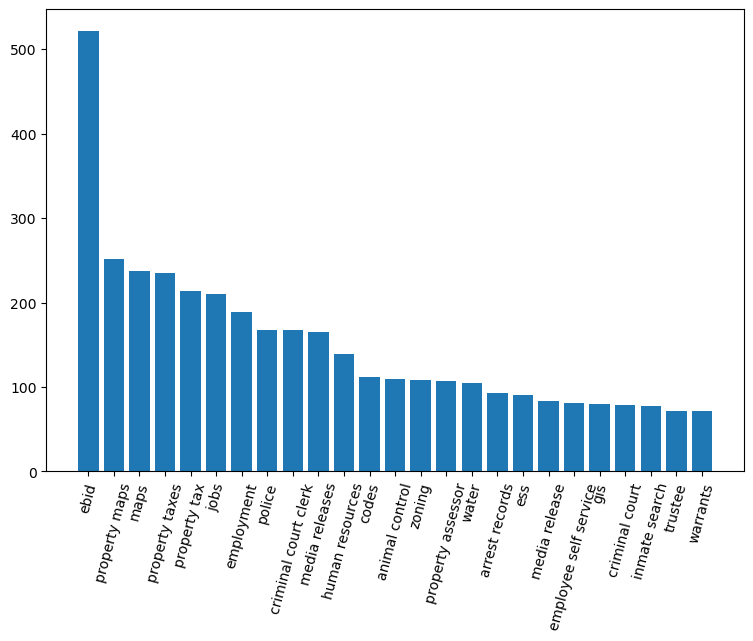

In [10]:
plt.figure(figsize=(9,6))
plt.bar('term', 'text', data = search_df.head(25))
plt.xticks(rotation = 75);